In [1]:
import pymongo
import pandas as pd
import numpy as np

from pymongo import MongoClient
from bson.objectid import ObjectId

import datetime

import matplotlib.pyplot as plt

from collections import defaultdict


%matplotlib inline
import json
plt.style.use('ggplot')

import seaborn as sns

from math import log10, floor

In [2]:
## Connect to local DB

client = MongoClient('localhost', 27017)
print ("Setup db access")

Setup db access


In [3]:
#
# Get collections from mongodb
#
#db = client.my_test_db
db = client.test


In [4]:
chunk = 100000
start = 0
end = start + chunk

In [5]:
#reponses = db.anon_student_task_responses.find({'correct':False})[start:end]
reponses = db.anon_student_task_responses.find()[start:end]

In [6]:
df_responses = pd.DataFrame(list(reponses))

In [7]:
print (df_responses.head())

                        _id               behavioral_traits  bonus  correct  \
0  5a00f1739100de1a390000d0                              []  False     True   
1  5a00f1739100de1a390000d5  [measuring_tools, orange_tick]  False     True   
2  5a00f1739100de1a390000d9                              []  False     True   
3  5a00f1739100de1a390000dc                              []  False     True   
4  5a00f1739100de1a390000df                              []  False     True   

       diff          id  incomplete         lesson  \
0  0.000000  nvrm82_9Yv       False       nline_1b   
1  0.563288  jVG3p9f-20       False       nline_1b   
2  0.601043  _NUUDSBMum       False  equivalence_0   
3  0.686276  B6HmMEMpoL       False  equivalence_0   
4  0.642014  IYWiIP26on       False  equivalence_0   

                                       level_summary  \
0  {'entered': True, 'path': 'nline_1b', 'lm_stat...   
1  {'entered': True, 'path': 'nline_1b', 'lm_stat...   
2  {'subject': 'fractions', 'uni

In [164]:
qids = db.anon_student_task_responses.distinct('qual_id')

In [165]:
qids = list(qids)

In [167]:
print (len(qids), qids)

27473 ['_Pd6uU3viE.parta.nvrm82_9Yv', '096-5s8eJ6.partb.jVG3p9f-20', 'z-FUzbs7Ez.parta._NUUDSBMum', 'z-FUzbs7Ez.parta.B6HmMEMpoL', 'EyVvIsCQCo.partb.IYWiIP26on', 'GQzhzHdUq_.set6.bUoNJIVgJi', 'BYGzN1ZApc.set2.39Y1vECA2c', 'BYGzN1ZApc.set3.faYl5HT_Sn', 'TJxldqZMXd.parta.jzC49--8x7', 'TJxldqZMXd.partb.hxS1eqLik1', 'TJxldqZMXd.partb.W2tLvQTbkI', 'JOD1-Zij75.partb.eKCslIK5ni', 'Lfm8VXz-oF.bonus15.a8xCwtQYH-', '_Pd6uU3viE.parta.vc55maq-Rm', '096-5s8eJ6.partb.lNxEwqVNhj', 'C2zASvJwfe.bonus.7czKTp17AW', 'ogme0bdOe3.parta.XyJVdG6_-8', '096-5s8eJ6.partb.jGq7IGYWTF', '_Pd6uU3viE.parta.gM26ScOfQr', '_Pd6uU3viE.parta.qrWIc3vNyV', 'zICSU-nesR.partb.w84rby06jn', 'ogme0bdOe3.parta.DWMh4Y7BQW', 'hHiTjKMgP4.parta.f9XfESw3sq', 'y0Bjb5gTe2.partb.qpXpIt2g3O', 'yIt5XijTTa.bonus.98JDhC48ny', 'FElR5ZJ2-D.parta.RWk6thwv7X', 'FElR5ZJ2-D.parta.lJZXpuGIxL', 'FElR5ZJ2-D.parta.ebOmOiHklV', 'piCaCJiyIo.parta.iFYu9imr7r', 'piCaCJiyIo.parta.TycwfEOe-0', 'piCaCJiyIo.parta.KlmUwiuqsE', 'piCaCJiyIo.parta.NlUnAY15Sv', 'G

In [175]:
q_counts = db.collection.aggregate(
    [
       { '$group' : { '_id': '$qual_id', 'count' : {'$sum' : 1}}}
    ]
)

[]


In [8]:
df_responses.shape

(100000, 27)

In [9]:
df2 = df_responses.join(pd.DataFrame(df_responses["student"].to_dict()).T)

In [10]:
df2 = df2.join(pd.DataFrame(df2['level_summary'].to_dict()).T)

In [11]:
df2 = df2.join(pd.DataFrame(df2['problems'].to_dict()).T)

In [12]:
df3  = df2.copy()

In [13]:
df2.iloc[70]

_id                                              5a00f1739100de1a390001a8
behavioral_traits                                                      []
bonus                                                               False
correct                                                             False
diff                                                                    0
id                                                             q2ElZZuy7P
incomplete                                                          False
lesson                                                         division_8
level_summary           {'entered': True, 't_elapsed': 115577, 'unit_n...
problem_set             lessons/fractions/lesson85/part_b/media/proble...
problem_set_id                                                 qIkkuC4fAD
problem_set_subspace                                                partb
qual_id                                       qIkkuC4fAD.partb.q2ElZZuy7P
randomly_selected                     

In [14]:
## Look act columns
print (df_responses.columns)

Index(['_id', 'behavioral_traits', 'bonus', 'correct', 'diff', 'id',
       'incomplete', 'lesson', 'level_summary', 'problem_set',
       'problem_set_id', 'problem_set_subspace', 'qual_id',
       'randomly_selected', 'response', 'response_idx', 'retried',
       'screenshot_url', 'second_try', 'session_id', 'student', 'sublesson',
       't', 'time_spent', 'timestamp', 'txt', 'untouched'],
      dtype='object')


In [15]:
## How many data samples
print (len(df_responses), "Number of entries")

100000 Number of entries


In [16]:
## Make 'description' a feature wih important words mapped

In [17]:
df3.columns

Index(['_id', 'behavioral_traits', 'bonus', 'correct', 'diff', 'id',
       'incomplete', 'lesson', 'level_summary', 'problem_set',
       'problem_set_id', 'problem_set_subspace', 'qual_id',
       'randomly_selected', 'response', 'response_idx', 'retried',
       'screenshot_url', 'second_try', 'session_id', 'student', 'sublesson',
       't', 'time_spent', 'timestamp', 'txt', 'untouched', 'grade',
       'mvt_group', 'mvt_group_code', 'school_id', 'section_id', 'student_id',
       'blank_slate_mastery', 'description', 'entered', 'lesson_type',
       'lm_stats', 'mastery', 'name', 'path', 'problems', 'stars', 'subject',
       't_elapsed', 'time_entered', 'time_exited', 'title', 'type',
       'unit_name', 'unit_rank', 'nretry_right', 'nretry_wrong', 'nright',
       'ntotal', 'nuntouched', 'nwrong'],
      dtype='object')

In [18]:
df3['percent_prob_correct'] = df3['nright'].astype(float) / df3['ntotal']

In [163]:
df3['qual_id'].unique()

array(['_Pd6uU3viE.parta.nvrm82_9Yv', '096-5s8eJ6.partb.jVG3p9f-20',
       'z-FUzbs7Ez.parta._NUUDSBMum', ..., 'HdvqniXBMa.parta.n0lbgKJV3M',
       'PiRuNU0bHe.parta.JC9B429KEH', 'FSOldX-rL7.partb.mnrdF_HvAf'], dtype=object)

In [19]:
df3.iloc[0]

_id                                              5a00f1739100de1a390000d0
behavioral_traits                                                      []
bonus                                                               False
correct                                                              True
diff                                                                    0
id                                                             nvrm82_9Yv
incomplete                                                          False
lesson                                                           nline_1b
level_summary           {'entered': True, 'path': 'nline_1b', 'lm_stat...
problem_set             lessons/fractions/lesson13_1/part_a/media/prob...
problem_set_id                                                 _Pd6uU3viE
problem_set_subspace                                                parta
qual_id                                       _Pd6uU3viE.parta.nvrm82_9Yv
randomly_selected                     

In [20]:
for idx in range(100):
    print ('index"', idx)
    print (df3.iloc[idx]['lesson'])
    print (df3.iloc[idx]['response'])

index" 0
nline_1b
{'fraction_cblock_chains': [{'right': 442, 'sum': {'numerator': 1, 'denominator': 2, '__as3_type': 'Fraction'}, 'pieces': ['1/2'], 'left': 97, 'lcm_sum': {'numerator': 1, 'denominator': 2, '__as3_type': 'Fraction'}}], 'plain_image_groups': [{'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/markers/end_marker_noline.swf'}, {'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/markers/start_marker.swf'}, {'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/objects/dog.swf'}, {'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/objects/cat_dog_trail.swf'}], 'den': '2', 'fraction_input_value': '1/2', 'num': '1', 'fraction_cblock_total_count': 1, 'numberline_associations': [[]], 'fraction_cblock_counts': {'1/2': 1}, 'fraction_cblock_containment': {}, 'whole': ''}
index" 1
nline_1b
{'fraction_cblock_total_count': 4, 'plain_image_groups': [{'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/objects/panda.swf'}, {'total': 1

In [21]:
def stringify_response(resp):
    my_val = str(resp).replace("': ","_")
    my_val = my_val.replace("_{"," ")
    my_val = my_val.replace("_[",", ")
    for c in [']','[','{','}',"'","",","]:
        my_val = my_val.replace(c,'')
    return my_val


In [22]:
stringify_response(df3.iloc[0]['response'])

'fraction_cblock_chains right_442 sum numerator_1 denominator_2 __as3_type_Fraction pieces 1/2 left_97 lcm_sum numerator_1 denominator_2 __as3_type_Fraction plain_image_groups total_1 url_assets/cms/wootmath_fractions/number_line/markers/end_marker_noline.swf total_1 url_assets/cms/wootmath_fractions/number_line/markers/start_marker.swf total_1 url_assets/cms/wootmath_fractions/number_line/objects/dog.swf total_1 url_assets/cms/wootmath_fractions/number_line/objects/cat_dog_trail.swf den_2 fraction_input_value_1/2 num_1 fraction_cblock_total_count_1 numberline_associations  fraction_cblock_counts 1/2_1 fraction_cblock_containment  whole_'

In [23]:
df3['response_str'] = df3['response'].apply(stringify_response)

In [24]:
for idx in range(20):
    print (idx, df3['response_str'].iloc[idx])

0 fraction_cblock_chains right_442 sum numerator_1 denominator_2 __as3_type_Fraction pieces 1/2 left_97 lcm_sum numerator_1 denominator_2 __as3_type_Fraction plain_image_groups total_1 url_assets/cms/wootmath_fractions/number_line/markers/end_marker_noline.swf total_1 url_assets/cms/wootmath_fractions/number_line/markers/start_marker.swf total_1 url_assets/cms/wootmath_fractions/number_line/objects/dog.swf total_1 url_assets/cms/wootmath_fractions/number_line/objects/cat_dog_trail.swf den_2 fraction_input_value_1/2 num_1 fraction_cblock_total_count_1 numberline_associations  fraction_cblock_counts 1/2_1 fraction_cblock_containment  whole_
1 fraction_cblock_total_count_4 plain_image_groups total_1 url_assets/cms/wootmath_fractions/number_line/objects/panda.swf total_1 url_assets/cms/wootmath_fractions/number_line/markers/start_marker.swf input_4 fraction_cblock_chains right_856 sum numerator_1 denominator_1 __as3_type_Fraction pieces 1/4 1/4 1/4 1/4 left_165 lcm_sum numerator_4 denomina

In [25]:
df3.columns

Index(['_id', 'behavioral_traits', 'bonus', 'correct', 'diff', 'id',
       'incomplete', 'lesson', 'level_summary', 'problem_set',
       'problem_set_id', 'problem_set_subspace', 'qual_id',
       'randomly_selected', 'response', 'response_idx', 'retried',
       'screenshot_url', 'second_try', 'session_id', 'student', 'sublesson',
       't', 'time_spent', 'timestamp', 'txt', 'untouched', 'grade',
       'mvt_group', 'mvt_group_code', 'school_id', 'section_id', 'student_id',
       'blank_slate_mastery', 'description', 'entered', 'lesson_type',
       'lm_stats', 'mastery', 'name', 'path', 'problems', 'stars', 'subject',
       't_elapsed', 'time_entered', 'time_exited', 'title', 'type',
       'unit_name', 'unit_rank', 'nretry_right', 'nretry_wrong', 'nright',
       'ntotal', 'nuntouched', 'nwrong', 'percent_prob_correct',
       'response_str'],
      dtype='object')

In [26]:
## In Response:
### convert K, V, and all K_V into words in a text doc
### Then add text
### The add description


In [27]:
def make_string_from_list(key, elem_list):
    # Append key to each item in list
    ans = ''
    for elem in elem_list:
        ans += key + '_' + elem 
        
        

        
    

def make_string(elem, key=None, top=True):
    ans = ''
    if not elem:
        return ans
    if top:
        top = False
        top_keys = []
        for idx in range(len(elem.keys())):
            top_keys.append(True)
            
    for idx, key in enumerate(elem.keys()):
        if top_keys[idx]:
            top = True
            top_keys[idx] = False
            ans += ' '
        else:
            top = False
        #print ('ans = ', ans)
        #print (type(elem[key]))
        if type(elem[key]) is str or\
                type(elem[key]) is int:
            #print ('add value', elem[key])
            value = str(elem[key])
            #ans += key + '_' + value + ' ' + value + ' '
            ans += key + '_' + value + ' '
        elif type(elem[key]) is list:
            #print ('add list', elem[key])
            temp_elem = dict()
            for item in elem[key]:
                temp_elem[key] = item
                ans += make_string(temp_elem, top) 
        elif type(elem[key]) is dict:
            #print ('add dict', elem[key])
            for item_key in elem[key].keys():
                temp_elem = dict()
                temp_elem[item_key] = elem[key][item_key]
                ans += key + '_' + make_string(temp_elem, top)
        elif type(elem[key]) is float:
            #print ('add dict', elem[key])
            sig = 2
            value = elem[key]
            value = round(value, sig-int(
            floor(log10(abs(value))))-1)
            value = str(value)
            #ans += key + '_' + value + ' ' + value + ' '
            ans += key + '_' + value + ' '
        # ans += ' ' + key + ' '
        #print ('not handled', elem[key])
     
        
    return ans
        
            
        
            
            

In [28]:
df3['response_doc'] = df3['response'].map(make_string)

In [29]:
df3['response_doc'] = df3['response_doc'].map(lambda x: x + ' ')

In [30]:
df3['response_doc'] = df3['response_doc'].map(lambda x: x.replace('/','_'))

In [31]:
df3['response_doc'] = df3['response_doc'] + ' ' + df3['txt'] 

In [32]:
df3['response_doc'] = df3['response_doc'].map(lambda x: x + ' ')

In [33]:
df3['response_doc'] = df3['response_doc'] +  ' ' + df3['description']

In [34]:
df3['response_doc'] = df3['response_doc'].map(lambda x: x.replace("\n", ""))

In [35]:
df3['response_doc'] = df3['response_doc'].map(lambda x: x.replace("?", " "))

In [36]:
df3.iloc[100]['response_doc']

" radio_group_mc2_ choice_A radio_group_mc2_ text_Yes  radio_group_mc1_ choice_B radio_group_mc1_ text_No   plain_image_groups_ url_assets_cms_wootmath_fractions_equal_parts_sixths_sixth_15.swf plain_image_groups_ total_1  plain_image_groups_ url_assets_cms_wootmath_fractions_equal_parts_sixths_sixth_06.swf plain_image_groups_ total_1   Do these shapes have 5/6 shaded Answer: [object Object]  Students deepen their understanding of fractions by identifying area models that are divided into equal parts and those that aren't. "

In [37]:
df3.iloc[100]['response']

{'plain_image_groups': [{'total': 1,
   'url': 'assets/cms/wootmath_fractions/equal_parts/sixths/sixth_15.swf'},
  {'total': 1,
   'url': 'assets/cms/wootmath_fractions/equal_parts/sixths/sixth_06.swf'}],
 'radio_group_mc1': {'choice': 'B', 'text': 'No'},
 'radio_group_mc2': {'choice': 'A', 'text': 'Yes'}}

In [38]:
df3.iloc[100]

_id                                              5a00f1739100de1a390001fa
behavioral_traits                                                      []
bonus                                                               False
correct                                                              True
diff                                                             0.304348
id                                                             Z3I2H8eOfO
incomplete                                                          False
lesson                                                      parts_whole_1
level_summary           {'subject': 'fractions', 'path': 'parts_whole_...
problem_set             lessons/fractions/lesson07/eq_parts/media/prob...
problem_set_id                                                 6nBHKepQ3Y
problem_set_subspace                                                 set2
qual_id                                        6nBHKepQ3Y.set2.Z3I2H8eOfO
randomly_selected                     

In [39]:
for idx in range(20):
    print (idx, df3['response_doc'].iloc[idx])

0   fraction_cblock_chains_ right_442 fraction_cblock_chains_ sum_ numerator_1 sum_ denominator_2 sum_ __as3_type_Fraction fraction_cblock_chains_  pieces_1_2 fraction_cblock_chains_ left_97 fraction_cblock_chains_ lcm_sum_ numerator_1 lcm_sum_ denominator_2 lcm_sum_ __as3_type_Fraction   plain_image_groups_ total_1 plain_image_groups_ url_assets_cms_wootmath_fractions_number_line_markers_end_marker_noline.swf  plain_image_groups_ total_1 plain_image_groups_ url_assets_cms_wootmath_fractions_number_line_markers_start_marker.swf  plain_image_groups_ total_1 plain_image_groups_ url_assets_cms_wootmath_fractions_number_line_objects_dog.swf  plain_image_groups_ total_1 plain_image_groups_ url_assets_cms_wootmath_fractions_number_line_objects_cat_dog_trail.swf  den_2  fraction_input_value_1_2  num_1  fraction_cblock_total_count_1    fraction_cblock_counts_ 1_2_1   whole_   Use the 1/2 pieces to figure out how far the dog traveled.Answer: 1/2  In the first part of this lesson, student partit

In [40]:
#df3['response_doc'] = df3['response_doc'].map( lambda x: " ".join(x.split('/')) if '/' in x else x)

In [41]:
df3.iloc[100]['response_doc']

" radio_group_mc2_ choice_A radio_group_mc2_ text_Yes  radio_group_mc1_ choice_B radio_group_mc1_ text_No   plain_image_groups_ url_assets_cms_wootmath_fractions_equal_parts_sixths_sixth_15.swf plain_image_groups_ total_1  plain_image_groups_ url_assets_cms_wootmath_fractions_equal_parts_sixths_sixth_06.swf plain_image_groups_ total_1   Do these shapes have 5/6 shaded Answer: [object Object]  Students deepen their understanding of fractions by identifying area models that are divided into equal parts and those that aren't. "

In [42]:
df3['response_doc'] = df3['response_doc'].map( lambda x: x.replace('[',' '))
df3['response_doc'] = df3['response_doc'].map( lambda x: x.replace(']',' '))

In [43]:
df3.iloc[100]['response_doc']

" radio_group_mc2_ choice_A radio_group_mc2_ text_Yes  radio_group_mc1_ choice_B radio_group_mc1_ text_No   plain_image_groups_ url_assets_cms_wootmath_fractions_equal_parts_sixths_sixth_15.swf plain_image_groups_ total_1  plain_image_groups_ url_assets_cms_wootmath_fractions_equal_parts_sixths_sixth_06.swf plain_image_groups_ total_1   Do these shapes have 5/6 shaded Answer:  object Object   Students deepen their understanding of fractions by identifying area models that are divided into equal parts and those that aren't. "

In [44]:
for idx in range(10):
    print ('Cluster ', + idx, ': ' + df3.iloc[idx]['response_doc'])

Cluster  0 :   fraction_cblock_chains_ right_442 fraction_cblock_chains_ sum_ numerator_1 sum_ denominator_2 sum_ __as3_type_Fraction fraction_cblock_chains_  pieces_1_2 fraction_cblock_chains_ left_97 fraction_cblock_chains_ lcm_sum_ numerator_1 lcm_sum_ denominator_2 lcm_sum_ __as3_type_Fraction   plain_image_groups_ total_1 plain_image_groups_ url_assets_cms_wootmath_fractions_number_line_markers_end_marker_noline.swf  plain_image_groups_ total_1 plain_image_groups_ url_assets_cms_wootmath_fractions_number_line_markers_start_marker.swf  plain_image_groups_ total_1 plain_image_groups_ url_assets_cms_wootmath_fractions_number_line_objects_dog.swf  plain_image_groups_ total_1 plain_image_groups_ url_assets_cms_wootmath_fractions_number_line_objects_cat_dog_trail.swf  den_2  fraction_input_value_1_2  num_1  fraction_cblock_total_count_1    fraction_cblock_counts_ 1_2_1   whole_   Use the 1/2 pieces to figure out how far the dog traveled.Answer: 1/2  In the first part of this lesson, stu

In [45]:
docs = list(df3['response_doc'])

In [46]:
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [47]:
data_samples = docs

In [48]:
n_features = 1000
n_samples = len(data_samples)
n_topics = 50
n_top_words = 20

In [49]:
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')

Extracting tf-idf features for NMF...


In [50]:
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))


done in 13.473s.


In [51]:
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))


Extracting tf features for LDA...
done in 13.877s.


In [52]:
n_features = 1000
n_samples = len(data_samples)
n_topics = 100
n_top_words = 30

In [53]:
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))


print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))


Extracting tf-idf features for NMF...
done in 13.859s.
Extracting tf features for LDA...
done in 10.177s.


In [54]:

from sklearn.cluster import KMeans, MiniBatchKMeans
true_k = 100

km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', n_init=1,
                         init_size=1000, batch_size=1000, random_state=42)

In [55]:
print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(tf)
print("done in %0.3fs" % (time() - t0))
print()

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=1000, max_iter=100, max_no_improvement=10,
        n_clusters=100, n_init=1, random_state=42, reassignment_ratio=0.01,
        tol=0.0, verbose=0)
done in 4.021s



In [56]:
print("Top terms per cluster:")


order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tf_vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:\n" % i, end='')
    for ind in order_centroids[i, :30]:
        print(' --- %s\n' % terms[ind], end='')
    print()

Top terms per cluster:
Cluster 0:
 --- number
 --- students
 --- answer
 --- mixed
 --- object
 --- enter
 --- fractions
 --- form
 --- simplest
 --- numbers
 --- line
 --- lesson
 --- using
 --- learn
 --- models
 --- num_1
 --- whole_1
 --- denominator
 --- fraction_input_value_1
 --- visual
 --- subtract
 --- improper
 --- proper
 --- location
 --- fraction
 --- whole_
 --- context
 --- mile
 --- world
 --- review

Cluster 1:
 --- fraction_cblock_chains_
 --- lcm_sum_
 --- sum_
 --- __as3_type_fraction
 --- numerator_1
 --- denominator_1
 --- fraction_cblock_counts_
 --- bar1_
 --- bar2_
 --- left_60
 --- pieces_1
 --- fraction_cblock_containment_
 --- bar3_
 --- fraction
 --- denominator_2
 --- denominator_5
 --- pieces_1_15
 --- denominator_3
 --- denominator_4
 --- right_750
 --- left_100
 --- pieces_1_5
 --- pieces_1_2
 --- fractions
 --- pieces_1_10
 --- students
 --- denominator_15
 --- answer
 --- bar
 --- model

Cluster 2:
 --- fraction_cblock_chains_
 --- sum_
 --- lcm_sum_

In [57]:
len(km.labels_)

100000

In [58]:
np.bincount(km.labels_)

array([ 2730,   757,   647,  1122,   246,   446,    13,   514,   341,
         425,   276,   835,  1013,   284,   251, 14179,   285,  1817,
          38,  1302,   135,  2290,   379,   317,   125,  2597,  1265,
         858,  2328,  1025,  2235,   470,   483,   636,  2293,   581,
         345,   628,    80,   431,   283,   651,   262,   736,   138,
        1837,   855,   302,  3968,   622,   269,  1053,   637,  1042,
         500,  1016,   622,   262,  1149,   283,   481,   457,   333,
         921,  1399,  1069,   149,  1006,   374,    53,   197,  1840,
          70,   247,  1903,  1143,   470,   580,   346,   747,   303,
         583,  1246,  1487,   284,  7886,    72,  1963,   414,   539,
         926,   272,    39,   721,  4290,     1,   199,   717,   374,   390])

In [59]:
df3['cluster_100'] = km.labels_

In [60]:
len(np.bincount(km.labels_))

100

In [61]:
df3.shape

(100000, 61)

In [62]:
df3['cluster_100'] = km.labels_


In [63]:
df3['trait_1'] = df3['behavioral_traits'].apply(lambda x : x[0] if len(x) > 0 else 'None' )

In [64]:
df3['trait_2'] = df3['behavioral_traits'].apply(lambda x : x[1] if len(x) > 1 else 'None' ) 

In [65]:
df3['trait_1'].value_counts()

None                             71238
how_to_model                      5348
inverts_numerator_denominator     4638
identifying_gt_lt                 2806
deci_understanding_gt_lt          1425
recognizing_the_whole             1307
deci_incorrect_inequality         1282
starting_from_0_nline             1047
dragging_to_add                    956
counting_hops_not_ticks            892
inequality_symbol                  788
partially_drawn_parts              680
modeled_incorrect_comparison       673
comparing_frac_gt_lt               542
misplaced_fraction_part_nline      480
measuring_tools                    459
deci_placing_decimal_points        408
partitioning_number_line           398
nline_as_whole                     325
deci_tens_vs_tenths                317
simplifying_mixed_numbers          292
simplify_with_common_denom         289
simplifying_bars_2                 280
deci_forgot_decimal_point          274
deci_hops_instead_ticks            274
deci_hundredths_vs_tenths

In [66]:
df3['trait_2'].value_counts()

None                            95784
simplifying_mixed_numbers         835
equally_sized_parts               680
modeled_incorrect_numerator       673
orange_tick                       459
simplifying_answers_nline         421
wrong_number_parts                398
dragging_to_add_3_circles         292
deci_break_tenths_hundredths      236
nline_restart_one                 214
modulo_ans                          8
Name: trait_2, dtype: int64

In [67]:
df_cluster_100 = df3.groupby('cluster_100')

In [68]:
len(df_cluster_100)

100

In [69]:
#df_cluster_100.head()

In [70]:
df_pcorrect = df3['percent_prob_correct'].groupby(df3['cluster_100']).describe()

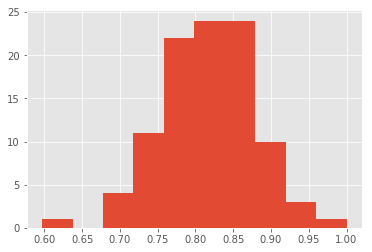

In [71]:
df_pcorrect['mean'].hist()

In [72]:
df_correct = df3['correct'].groupby(df3['cluster_100']).mean()

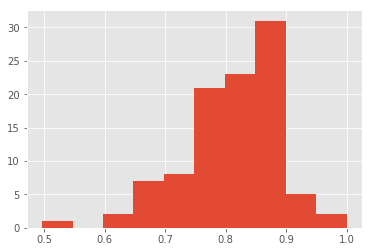

In [73]:
df_correct.hist()

In [74]:
df_true = df3[df3['correct']==True]
df_correctx_true = df_true['percent_prob_correct']

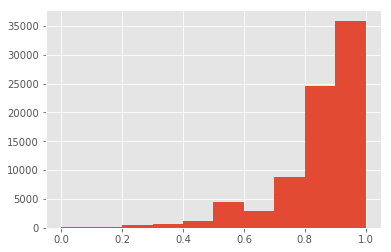

In [75]:
df_correctx_true.hist()

In [76]:
df_false = df3[df3['correct']!=True]
df_correctx_false = df_false['percent_prob_correct']

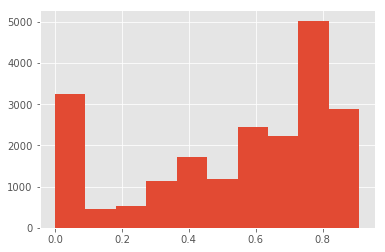

In [77]:
df_correctx_false.hist()

In [78]:
df_trait_1 = df3.groupby(['cluster_100', 'trait_1']).size().unstack(fill_value=0)

In [79]:
df_trait_2 = df3.groupby(['cluster_100', 'trait_2']).size().unstack(fill_value=0)

In [80]:
#df_trait_2

In [81]:
df_trait_2.columns

Index(['None', 'deci_break_tenths_hundredths', 'dragging_to_add_3_circles',
       'equally_sized_parts', 'modeled_incorrect_numerator', 'modulo_ans',
       'nline_restart_one', 'orange_tick', 'simplifying_answers_nline',
       'simplifying_mixed_numbers', 'wrong_number_parts'],
      dtype='object', name='trait_2')

In [82]:
df_trait_1.columns

Index(['None', 'area_model', 'benchmark_1_2', 'benchmark_quarters',
       'comparing_frac_gt_lt', 'counting_hops_for_division',
       'counting_hops_not_ticks', 'deci_add_to_model',
       'deci_break_tenths_hundredths', 'deci_building_tenths',
       'deci_compare_no_models', 'deci_forgot_decimal_point',
       'deci_hops_instead_ticks', 'deci_hundredths_vs_tenths',
       'deci_incorrect_inequality', 'deci_placing_decimal_points',
       'deci_point_location_correct', 'deci_tens_vs_tenths',
       'deci_understanding_gt_lt', 'determine_the_frac_part',
       'dragging_to_add', 'fraction_of_set', 'hops_vs_ticks', 'how_to_model',
       'identifying_gt_lt', 'inequality_symbol',
       'inverts_numerator_denominator', 'measuring_tools',
       'misplaced_fraction_part_nline', 'mixed_number_quotient',
       'mixed_numbers_on_number_line', 'modeled_incorrect_comparison',
       'modeling_fraction_division', 'multiplication',
       'multiplying_whole_by_proper', 'nline_as_whole',
     

In [83]:
[x for x in df_trait_2.columns if x not in df_trait_1.columns ]

['dragging_to_add_3_circles',
 'equally_sized_parts',
 'modeled_incorrect_numerator',
 'modulo_ans',
 'nline_restart_one',
 'orange_tick',
 'simplifying_answers_nline',
 'wrong_number_parts']

In [84]:
[x for x in df_trait_1.columns if x not in df_trait_2.columns ]

['area_model',
 'benchmark_1_2',
 'benchmark_quarters',
 'comparing_frac_gt_lt',
 'counting_hops_for_division',
 'counting_hops_not_ticks',
 'deci_add_to_model',
 'deci_building_tenths',
 'deci_compare_no_models',
 'deci_forgot_decimal_point',
 'deci_hops_instead_ticks',
 'deci_hundredths_vs_tenths',
 'deci_incorrect_inequality',
 'deci_placing_decimal_points',
 'deci_point_location_correct',
 'deci_tens_vs_tenths',
 'deci_understanding_gt_lt',
 'determine_the_frac_part',
 'dragging_to_add',
 'fraction_of_set',
 'hops_vs_ticks',
 'how_to_model',
 'identifying_gt_lt',
 'inequality_symbol',
 'inverts_numerator_denominator',
 'measuring_tools',
 'misplaced_fraction_part_nline',
 'mixed_number_quotient',
 'mixed_numbers_on_number_line',
 'modeled_incorrect_comparison',
 'modeling_fraction_division',
 'multiplication',
 'multiplying_whole_by_proper',
 'nline_as_whole',
 'numerator_off_by_one_nline',
 'only_tenths_entered',
 'partially_drawn_parts',
 'partitioning_number_line',
 'recognizing

In [85]:
#df_trait_1 = df_trait_1.drop('None', axis=1)
#df_trait_2 = df_trait_2.drop('None', axis=1)

In [86]:
df_traits = pd.merge(left=df_trait_1,right=df_trait_2, how='left' )


In [87]:
df_trait_1.index.rename('cluster_100', inplace=True)

In [88]:
df_trait_2.index.rename('cluster_100', inplace=True)

In [89]:
df_traits.columns

Index(['None', 'area_model', 'benchmark_1_2', 'benchmark_quarters',
       'comparing_frac_gt_lt', 'counting_hops_for_division',
       'counting_hops_not_ticks', 'deci_add_to_model',
       'deci_break_tenths_hundredths', 'deci_building_tenths',
       'deci_compare_no_models', 'deci_forgot_decimal_point',
       'deci_hops_instead_ticks', 'deci_hundredths_vs_tenths',
       'deci_incorrect_inequality', 'deci_placing_decimal_points',
       'deci_point_location_correct', 'deci_tens_vs_tenths',
       'deci_understanding_gt_lt', 'determine_the_frac_part',
       'dragging_to_add', 'fraction_of_set', 'hops_vs_ticks', 'how_to_model',
       'identifying_gt_lt', 'inequality_symbol',
       'inverts_numerator_denominator', 'measuring_tools',
       'misplaced_fraction_part_nline', 'mixed_number_quotient',
       'mixed_numbers_on_number_line', 'modeled_incorrect_comparison',
       'modeling_fraction_division', 'multiplication',
       'multiplying_whole_by_proper', 'nline_as_whole',
     

In [90]:
df_traits = pd.concat([df_trait_1, df_trait_2], axis=1)

In [91]:
print (df_traits.shape)
print (df_trait_1.shape)
print (df_trait_2.shape)


(100, 62)
(100, 51)
(100, 11)


In [92]:
df_traits.columns

Index(['None', 'area_model', 'benchmark_1_2', 'benchmark_quarters',
       'comparing_frac_gt_lt', 'counting_hops_for_division',
       'counting_hops_not_ticks', 'deci_add_to_model',
       'deci_break_tenths_hundredths', 'deci_building_tenths',
       'deci_compare_no_models', 'deci_forgot_decimal_point',
       'deci_hops_instead_ticks', 'deci_hundredths_vs_tenths',
       'deci_incorrect_inequality', 'deci_placing_decimal_points',
       'deci_point_location_correct', 'deci_tens_vs_tenths',
       'deci_understanding_gt_lt', 'determine_the_frac_part',
       'dragging_to_add', 'fraction_of_set', 'hops_vs_ticks', 'how_to_model',
       'identifying_gt_lt', 'inequality_symbol',
       'inverts_numerator_denominator', 'measuring_tools',
       'misplaced_fraction_part_nline', 'mixed_number_quotient',
       'mixed_numbers_on_number_line', 'modeled_incorrect_comparison',
       'modeling_fraction_division', 'multiplication',
       'multiplying_whole_by_proper', 'nline_as_whole',
     

In [93]:
df_traits = df_traits.groupby(df_traits.columns, axis=1).sum()

In [94]:
#df_traits

In [95]:
df_traits = df_traits.drop('None', axis=1)

In [96]:
#df_traits

In [97]:
import seaborn as sns

In [98]:
df_traits_dict = df_traits.to_dict()

In [99]:
df_traits_dict_cluster = df_traits.transpose().to_dict()

In [100]:
df_traits_dict_cluster_no0 = {}
for cluster, trait_dict in df_traits_dict_cluster.items():
    # print (cluster, trait_dict)
    df_traits_dict_cluster_no0[cluster] = { k:v for k,v in trait_dict.items() if v != 0}

In [101]:
df_traits_dict_cluster_no0[88]

{'comparing_frac_gt_lt': 5,
 'inequality_symbol': 2,
 'inverts_numerator_denominator': 5,
 'measuring_tools': 6,
 'orange_tick': 6,
 'simplify_with_common_denom': 5}

In [102]:
df_traits_dict_cluster_no0[40]

{'dragging_to_add': 32,
 'how_to_model': 22,
 'multiplying_whole_by_proper': 18,
 'recognizing_the_whole': 5,
 'simplifying_mixed_numbers': 32,
 'simplifying_subtraction': 2}

In [103]:
print (sorted(list(df_traits.columns)))

['area_model', 'benchmark_1_2', 'benchmark_quarters', 'comparing_frac_gt_lt', 'counting_hops_for_division', 'counting_hops_not_ticks', 'deci_add_to_model', 'deci_break_tenths_hundredths', 'deci_building_tenths', 'deci_compare_no_models', 'deci_forgot_decimal_point', 'deci_hops_instead_ticks', 'deci_hundredths_vs_tenths', 'deci_incorrect_inequality', 'deci_placing_decimal_points', 'deci_point_location_correct', 'deci_tens_vs_tenths', 'deci_understanding_gt_lt', 'determine_the_frac_part', 'dragging_to_add', 'dragging_to_add_3_circles', 'equally_sized_parts', 'fraction_of_set', 'hops_vs_ticks', 'how_to_model', 'identifying_gt_lt', 'inequality_symbol', 'inverts_numerator_denominator', 'measuring_tools', 'misplaced_fraction_part_nline', 'mixed_number_quotient', 'mixed_numbers_on_number_line', 'modeled_incorrect_comparison', 'modeled_incorrect_numerator', 'modeling_fraction_division', 'modulo_ans', 'multiplication', 'multiplying_whole_by_proper', 'nline_as_whole', 'nline_restart_one', 'numer

In [104]:
temp = (sorted(list(df_traits.columns)))
for idx, x in enumerate(temp):
    if idx > 0:
        if x == temp[idx - 1]:
            print (x)

In [105]:
#df_traits_norm = (df_traits - df_traits.mean()) / (df_traits.max() - df_traits.min())
df_traits_norm = (df_traits  / (df_traits.sum()) )

In [106]:
df_traits_norm = df_traits_norm.applymap( lambda x: 0 if x < 0 else x)

In [107]:
#df_traits_norm

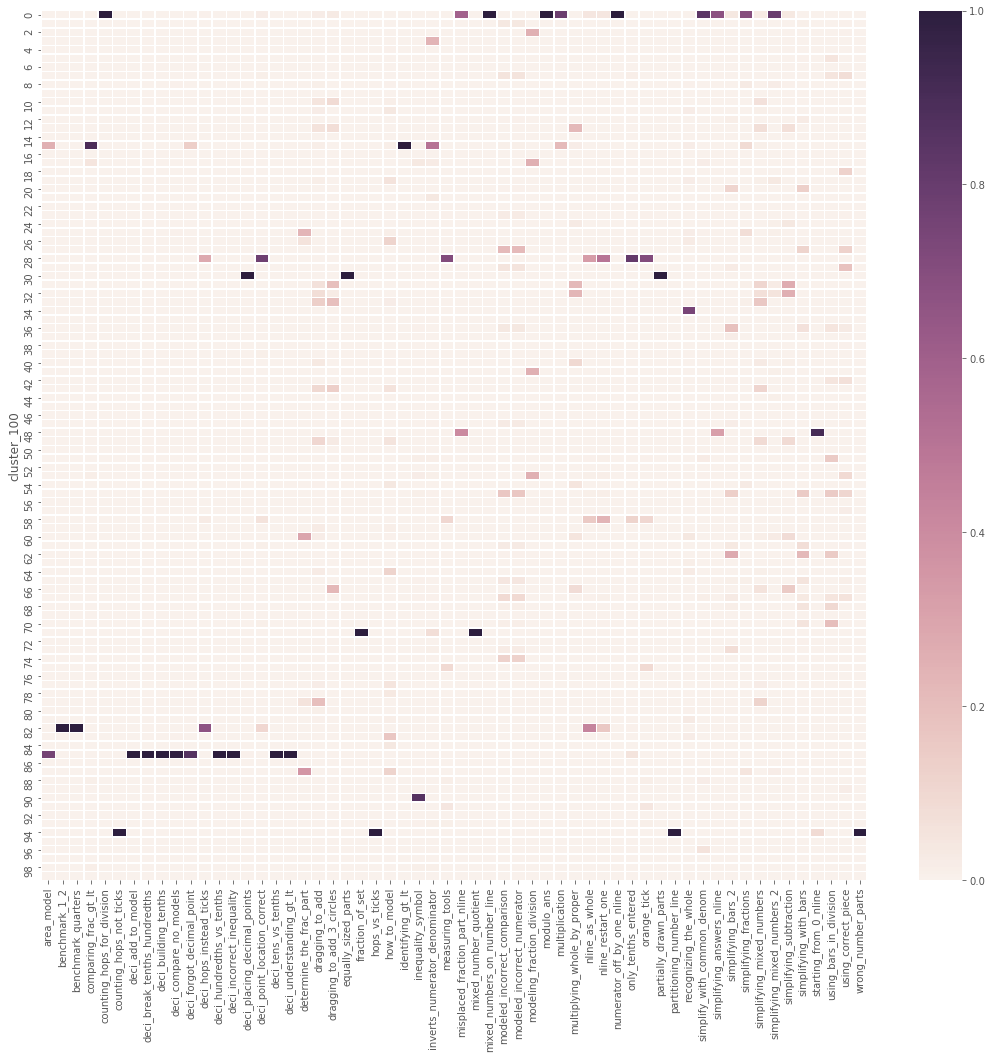

In [108]:
fig = plt.figure(figsize=(18.5, 16))
cmap = sns.cubehelix_palette(light=.95, as_cmap=True)
sns.heatmap(df_traits_norm, cmap=cmap,  linewidths=.5)

#sns.heatmap(df_traits_norm, cmap="YlGnBu",  linewidths=.5)

In [109]:
df_traits_norm.shape

(100, 58)

In [110]:
fig.savefig('heat_map_100_2.png')


In [111]:

#df_traits.plot.bar(stacked=True, figsize=(18.5, 16), legend=False)

In [112]:
df_traits.to_csv('cluster_100.csv')

In [113]:
df_traits2 = pd.concat([df3['percent_prob_correct'].groupby(df3['cluster_100']).describe(), df_traits], axis=1)

In [114]:
df_traits2.to_csv('cluster_100_plus_correct.csv')

In [115]:
df_traits_dict = df_traits.to_dict(orient='dict')

In [116]:
#df_traits_dict

In [117]:
df_traits_dict2 = {}
cluster_with_no_trait = list(np.arange(100))
cluster_with_lt_10_trait = list(np.arange(100))

In [118]:
for trait in df_traits_dict:
    #print (idx, trait)
    df_traits_dict2[trait] = {}
    for cluster in df_traits_dict[trait]:
        #print (trait, cluster, df_traits_dict[trait][cluster])
        if  df_traits_dict[trait][cluster] > 0:
            df_traits_dict2[trait][cluster] = df_traits_dict[trait][cluster]
            if cluster in cluster_with_no_trait:
                cluster_with_no_trait.remove(cluster)
            if  df_traits_dict[trait][cluster] > 9:
                if cluster in cluster_with_lt_10_trait:
                    cluster_with_lt_10_trait.remove(cluster)

In [119]:
print (df_traits_dict2)

{'area_model': {15: 4, 85: 12}, 'benchmark_1_2': {82: 8}, 'benchmark_quarters': {82: 66}, 'comparing_frac_gt_lt': {2: 1, 7: 1, 15: 482, 17: 26, 39: 1, 41: 2, 51: 2, 53: 8, 55: 2, 64: 2, 76: 1, 88: 5, 93: 1, 98: 8}, 'counting_hops_for_division': {0: 36}, 'counting_hops_not_ticks': {94: 892}, 'deci_add_to_model': {85: 113}, 'deci_break_tenths_hundredths': {85: 255}, 'deci_building_tenths': {85: 46}, 'deci_compare_no_models': {8: 1, 25: 1, 83: 1, 85: 156}, 'deci_forgot_decimal_point': {15: 38, 85: 236}, 'deci_hops_instead_ticks': {0: 2, 20: 1, 28: 78, 51: 1, 58: 7, 70: 1, 82: 184}, 'deci_hundredths_vs_tenths': {85: 244}, 'deci_incorrect_inequality': {85: 1282}, 'deci_placing_decimal_points': {30: 405, 85: 3}, 'deci_point_location_correct': {0: 2, 7: 1, 28: 82, 39: 1, 58: 6, 61: 1, 70: 1, 82: 11}, 'deci_tens_vs_tenths': {85: 317}, 'deci_understanding_gt_lt': {85: 1425}, 'determine_the_frac_part': {25: 4, 26: 1, 60: 5, 79: 1, 87: 6}, 'dragging_to_add': {0: 19, 4: 1, 8: 8, 10: 47, 11: 15, 13

In [120]:
cluster_with_no_trait, 

([6, 9, 14, 45, 46, 50, 86, 95, 97],)

In [121]:
len(cluster_with_no_trait)

9

In [122]:
len(cluster_with_lt_10_trait)

31

In [123]:
x = list(df_traits.index)

In [124]:
df_traits.shape

(100, 58)

In [125]:
y = df_traits.sum(axis=1)

In [126]:
y

cluster_100
0     1305
1       60
2        9
3     1123
4       29
5        4
6        0
7       89
8       75
9        0
10     226
11     249
12      26
13     231
14       0
15    5837
16       4
17     174
18      16
19     384
20      82
21     180
22       6
23      48
24      25
25     124
26     643
27     337
28    1136
29     101
      ... 
70      47
71     587
72       2
73     106
74     168
75      86
76       7
77     301
78     171
79     326
80      41
81     119
82     446
83     927
84     208
85    4096
86       0
87     644
88      29
89      11
90     675
91      40
92       6
93      55
94    2002
95       0
96      16
97       0
98      58
99       4
Length: 100, dtype: int64

<Container object of 100 artists>

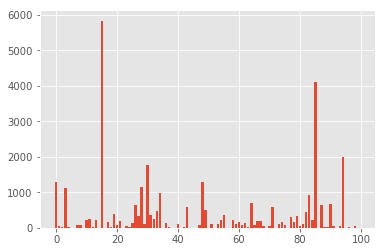

In [127]:

plt.bar( x, y)


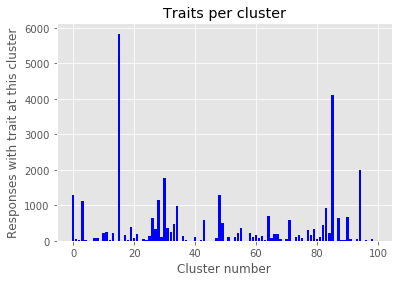

In [128]:
fig, ax = plt.subplots()

rects1 = ax.bar(x, y, color='b')
ax.set_xlabel('Cluster number')
ax.set_ylabel('Responses with trait at this cluster')
ax.set_title('Traits per cluster')



In [129]:
counts_per_cluster = np.bincount(km.labels_)

In [130]:
print (counts_per_cluster)

[ 2730   757   647  1122   246   446    13   514   341   425   276   835
  1013   284   251 14179   285  1817    38  1302   135  2290   379   317
   125  2597  1265   858  2328  1025  2235   470   483   636  2293   581
   345   628    80   431   283   651   262   736   138  1837   855   302
  3968   622   269  1053   637  1042   500  1016   622   262  1149   283
   481   457   333   921  1399  1069   149  1006   374    53   197  1840
    70   247  1903  1143   470   580   346   747   303   583  1246  1487
   284  7886    72  1963   414   539   926   272    39   721  4290     1
   199   717   374   390]


In [131]:
counts_per_cluster = list(counts_per_cluster)

In [132]:
counts_per_cluster = [x for x in counts_per_cluster if x != 0]

In [133]:
counts_per_cluster = np.array(counts_per_cluster)

In [134]:
y1 = y / counts_per_cluster

In [135]:
#y

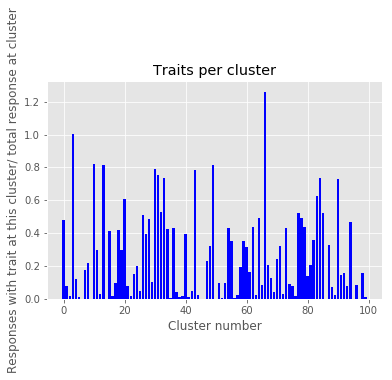

In [136]:
fig, ax = plt.subplots()

rects1 = ax.bar(x, y1, color='b')
ax.set_xlabel('Cluster number')
ax.set_ylabel('Responses with trait at this cluster/ total response at cluster')
ax.set_title('Traits per cluster')

In [137]:
df_traits2p = df_traits2.copy()

In [138]:
df_traits2p['num_correct_true'] = df3.groupby('cluster_100')['correct'].apply(lambda x: (x==True).sum())

In [139]:
df_traits2p['percent_correct_true'] = (df_traits2p['num_correct_true']/df_traits2p['count'])*100.0

In [140]:
df_traits2p.drop('num_correct_true', axis=1, inplace=True)

In [141]:
#df_traits2p

In [142]:
#df_traits2

In [143]:
df_percent_prob_correct = df_traits2['mean']

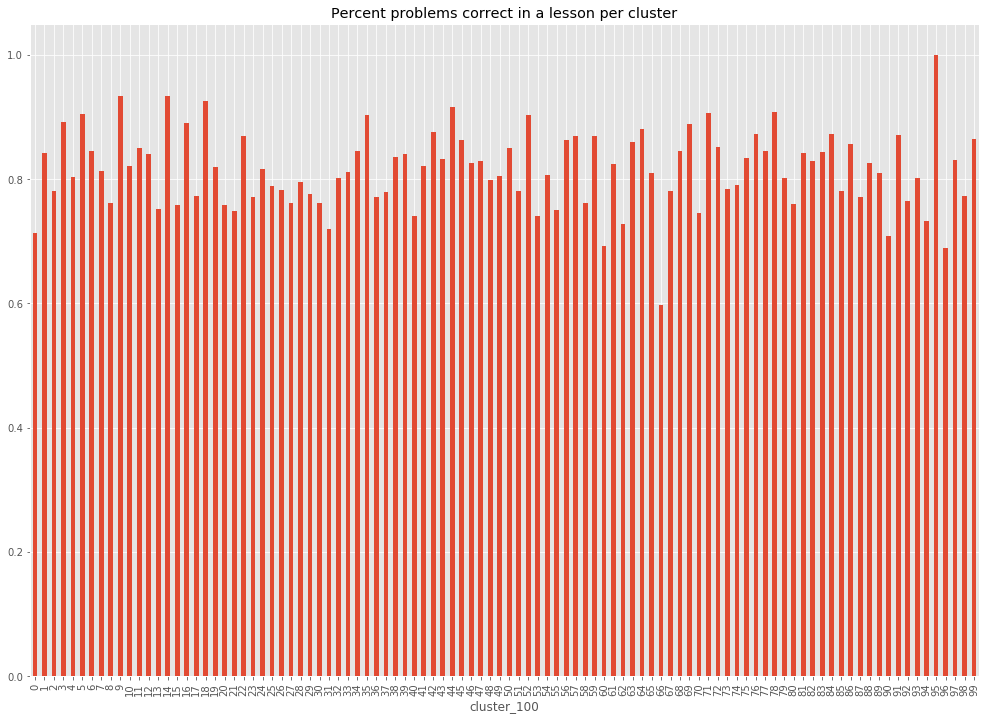

In [144]:
df_percent_prob_correct.plot.bar(figsize=(17,12), title='Percent problems correct in a lesson per cluster')

In [145]:
df_percent_correct_true = df_traits2p['percent_correct_true']

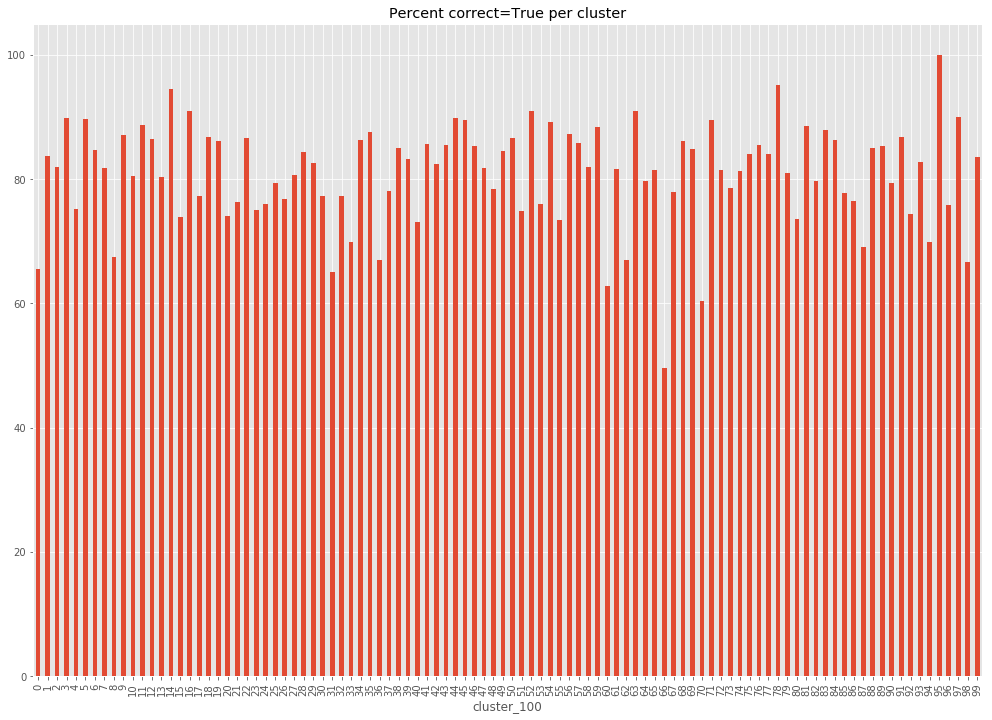

In [146]:
df_percent_correct_true.plot.bar(figsize=(17,12), title='Percent correct=True per cluster')

In [147]:
df_sample_size = df_traits2p['count']

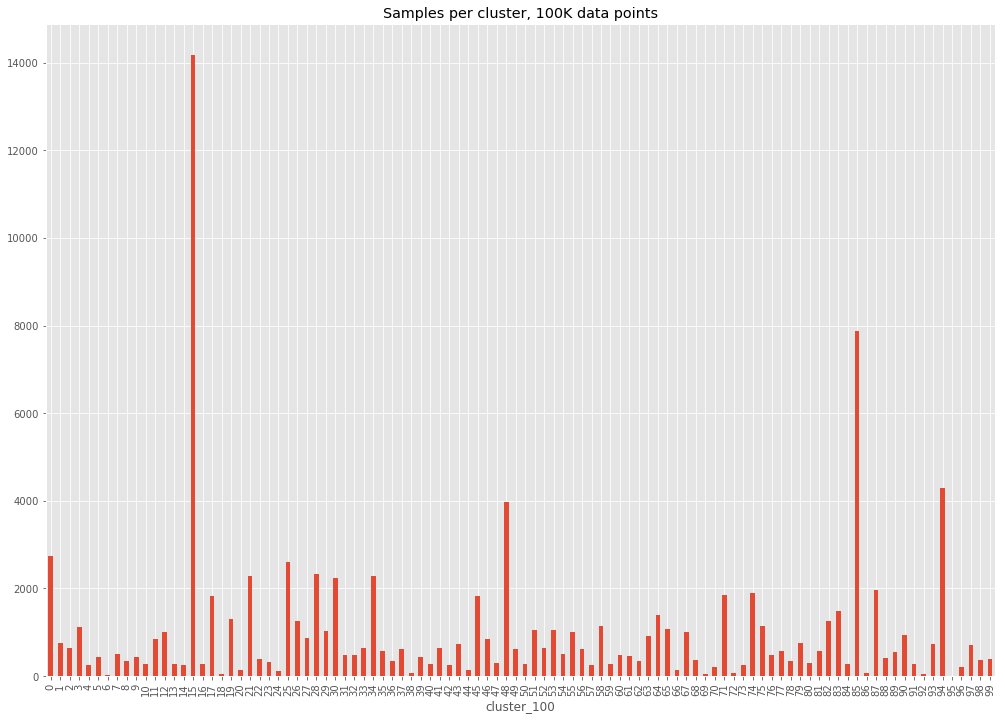

In [148]:
df_sample_size.plot.bar(figsize=(17,12), title='Samples per cluster, 100K data points')

In [149]:
df_trait_dict = df_traits.transpose().to_dict()

In [150]:
df_trait_dict_new = defaultdict()
for cluster in df_trait_dict:
    # print (cluster,df_trait_dict[cluster])
    df_trait_dict_new[cluster] = defaultdict()
    for trait in df_trait_dict[cluster]:
        # print (trait, df_trait_dict[cluster][trait])
        if df_trait_dict[cluster][trait] != 0:
            df_trait_dict_new[cluster][trait] = df_trait_dict[cluster][trait]
        

In [151]:
#df_trait_dict_new

In [152]:
sums = df_traits.sum()

In [153]:
df_traits_pct = df_traits/sums * 100.0

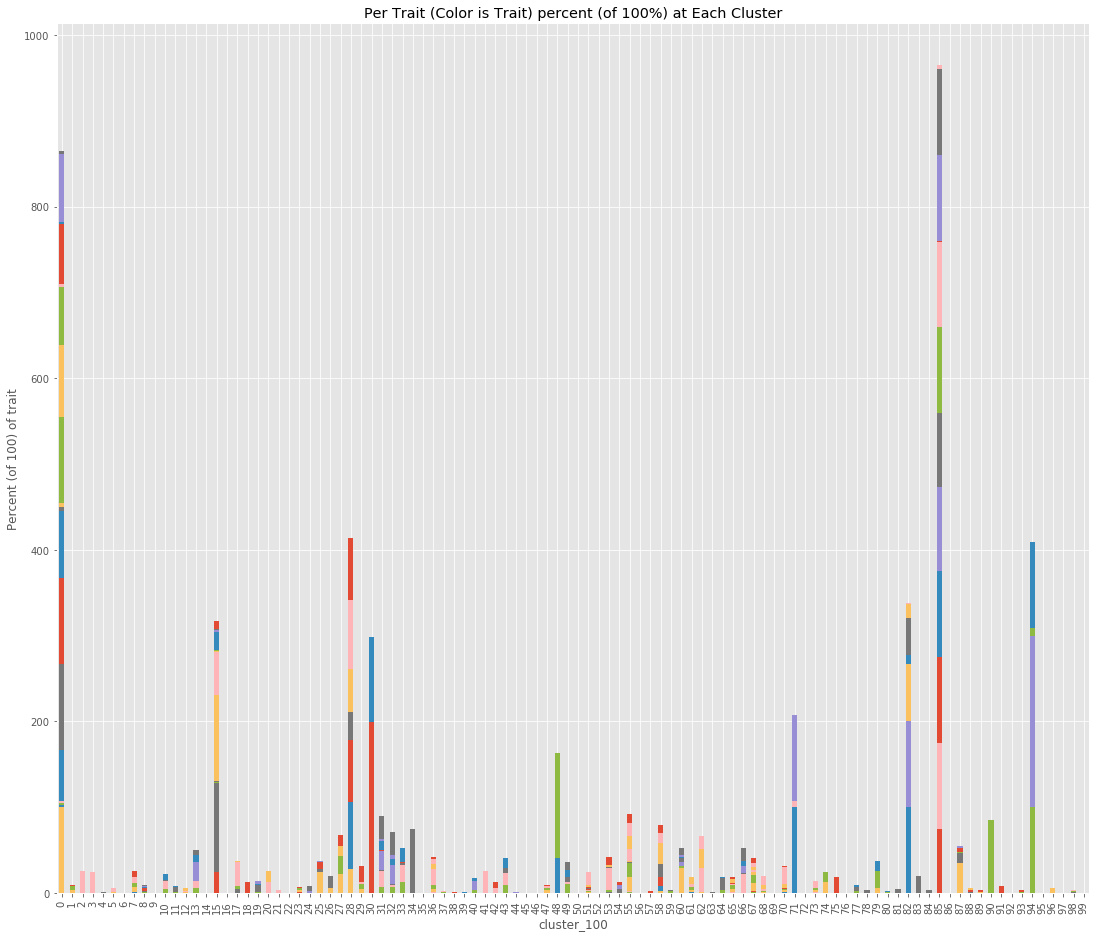

In [154]:
ax = df_traits_pct.plot.bar(stacked=True, figsize=(18.5, 16), legend=False, title='Per Trait (Color is Trait) percent (of 100%) at Each Cluster')
ax.set_ylabel("Percent (of 100) of trait")

In [155]:
df_traits_pct_dict = df_traits_pct.transpose().to_dict()

In [156]:
df_traits_pct_dict_new = defaultdict()

In [157]:
for cluster in df_traits_pct_dict:
    #print (cluster,df_traits_pct_dict[cluster])
    df_traits_pct_dict_new[cluster] = defaultdict()
    for trait in df_traits_pct_dict[cluster]:
        # print (trait, df_traits_pct_dict[cluster][trait])
        if df_traits_pct_dict[cluster][trait] > 5:
            df_traits_pct_dict_new[cluster][trait] = df_traits_pct_dict[cluster][trait]
        

In [162]:
for key in df_traits_pct_dict_new:
    print ("Cluster {0} -- count of samples in this cluster {1} percent correct={2:.1f}".
               format(key, df_traits2.iloc[key]['count'],df_traits2p.iloc[key]['percent_correct_true'] ))
    if len(df_traits_pct_dict_new[key]) < 1:
        print ("None")
    else:
        for trait in df_traits_pct_dict_new[key]:
            print (' -- ' + str(trait) + ' : '  + "{0:.1f}".format(df_traits_pct_dict_new[key][trait]))

Cluster 0 -- count of samples in this cluster 2730.0 percent correct=65.5
 -- counting_hops_for_division : 100.0
 -- misplaced_fraction_part_nline : 59.6
 -- mixed_numbers_on_number_line : 100.0
 -- modulo_ans : 100.0
 -- multiplication : 78.5
 -- numerator_off_by_one_nline : 100.0
 -- simplify_with_common_denom : 83.7
 -- simplifying_answers_nline : 67.9
 -- simplifying_fractions : 69.6
 -- simplifying_mixed_numbers_2 : 78.9
Cluster 1 -- count of samples in this cluster 757.0 percent correct=83.8
None
Cluster 2 -- count of samples in this cluster 647.0 percent correct=81.9
 -- modeling_fraction_division : 25.0
Cluster 3 -- count of samples in this cluster 1122.0 percent correct=89.8
 -- inverts_numerator_denominator : 24.2
Cluster 4 -- count of samples in this cluster 246.0 percent correct=75.2
None
Cluster 5 -- count of samples in this cluster 446.0 percent correct=89.7
None
Cluster 6 -- count of samples in this cluster 13.0 percent correct=84.6
None
Cluster 7 -- count of samples in 